# Random Walks

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1D
Start at position 0. Take N steps, moving left or right uniformly at random for each step.

In [81]:
def random_walk(N):
    position = 0
    positions = [position]
    for j in range(N):
        if random.randint(0, 1) == 0:
            position += 1
        else:
            position -= 1

        positions.append(position)

    return positions

def k_random_walks(trials, N):
    end_points = list()
    for i in range(trials):
        trial = random_walk(N)
        end_points.append(trial[-1])
    return end_points

def random_walk_to_start():
    position = 1 if random.randint(0, 1) == 0 else -1
    steps = 1
    while position != 0:
        if random.randint(0, 1) == 0:
            position += 1
        else:
            position -= 1
            
        steps +=1

    return steps

In [70]:
end_points = k_random_walks(10000, 10)
print('Mean:', np.mean(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: -0.0274
Variance: 10.0926585059


## Plotting One Walk

In [71]:
def plot_walk(positions):
    plt.plot(range(len(positions)), positions)
    plt.show()

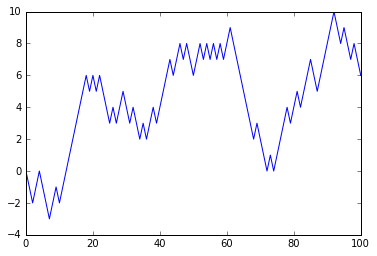

In [79]:
plot_walk(random_walk(100))

## Plotting the Distribution of End Points for k Walks

In [73]:
def plot_k_walks(end_points):    
    plt.hist(end_points, bins=len(set(end_points))*2+1)
    plt.show()

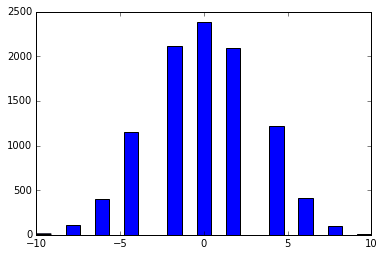

In [74]:
plot_k_walks(k_random_walks(10000, 10))

## Uncertainty vs Sample Size

In [75]:
def uncertainty(samples):
    return (np.var(samples, ddof=1) / len(samples))**0.5

end_points = k_random_walks(1000, 10)
print('Mean:', np.mean(end_points))
print('Uncertainty:', uncertainty(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: -0.022
Uncertainty: 0.0981282076935
Variance: 9.62914514515


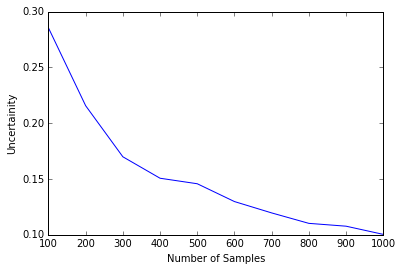

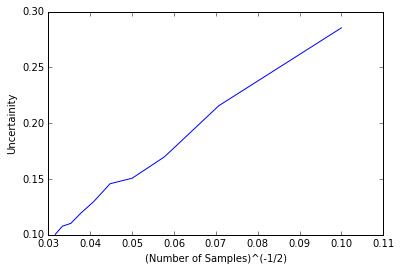

In [80]:
sample_sizes = []
uncertainties = []
for samples in range(100, 1001, 100):
    end_points = k_random_walks(samples, 10)
    sample_sizes.append(samples)
    uncertainties.append(uncertainty(end_points))
    
plt.plot(sample_sizes, uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('Number of Samples')
plt.show()

plt.plot(list(map(lambda x: x**-.5, sample_sizes)), uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('(Number of Samples)^(-1/2)')
plt.show()

## Returning to Start Position

In [ ]:
steps = []
for i in range(1000):
    steps.append(random_walk_to_start())
    
print('Mean:', np.mean(steps))
print('Uncertainty:', uncertainty(steps))
print('Variance:', np.var(steps, ddof=1))

plt.hist(steps)
plt.show()